### Decision Tree Task

### 약물 A, B, C, X, Y
##### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 c, 약물 x 및 y 중 하나에 반응했다.
-  미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

##### feature
- Age: 환자의 나이
- Sex: 환자의 성별
- BP: 혈압
- Cholesterol: 콜레스테롤 수치
- Na_to_K: 나트륨-칼륨

##### target
- Drug: 의약품, 환자에게 효과가 있었던 약

In [1]:
import pandas as pd

drugs_df = pd.read_csv('./datasets/drugs.csv')
drugs_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#### 레이블 인코딩
- 문자열 값을 정수로 변경하는 데이터 전처리 기법

##### 타겟 데이터(의약품) 레이블 인코딩

In [2]:
from sklearn.preprocessing import LabelEncoder
drugs_encoder = LabelEncoder()

targets = drugs_encoder.fit_transform(drugs_df['Drug'])
drugs_df['Drug'] = targets

In [3]:
display(drugs_df)
drugs_encoder.classes_[drugs_df.loc[0, 'Drug']]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,4
1,47,M,LOW,HIGH,13.093,2
2,47,M,LOW,HIGH,10.114,2
3,28,F,NORMAL,HIGH,7.798,3
4,61,F,LOW,HIGH,18.043,4
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,2
196,16,M,LOW,HIGH,12.006,2
197,52,M,NORMAL,HIGH,9.894,3
198,23,M,NORMAL,NORMAL,14.020,3


'drugY'

In [4]:
from sklearn.preprocessing import LabelEncoder
drugs_encoder = LabelEncoder()

targets = drugs_encoder.fit_transform(drugs_df['Sex'])
drugs_df['Sex'] = targets

In [5]:
display(drugs_df)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,4
1,47,1,LOW,HIGH,13.093,2
2,47,1,LOW,HIGH,10.114,2
3,28,0,NORMAL,HIGH,7.798,3
4,61,0,LOW,HIGH,18.043,4
...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,2
196,16,1,LOW,HIGH,12.006,2
197,52,1,NORMAL,HIGH,9.894,3
198,23,1,NORMAL,NORMAL,14.020,3


In [6]:
from sklearn.preprocessing import LabelEncoder
drugs_encoder = LabelEncoder()

targets = drugs_encoder.fit_transform(drugs_df['BP'])
drugs_df['BP'] = targets

In [7]:
from sklearn.preprocessing import LabelEncoder
drugs_encoder = LabelEncoder()

targets = drugs_encoder.fit_transform(drugs_df['Cholesterol'])
drugs_df['Cholesterol'] = targets

In [8]:
display(drugs_df)
# BP  HIGH = 0 / LOW = 1 / NORMAL = 2
# Cholesterol 0 = HIGH / 1 = NORMAL
# Sex FEMALE = 0 / MALE = 1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier 생성
decision_tree_classifier = DecisionTreeClassifier(random_state=124)

# 'Drug' 컬럼을 타겟(레이블) 값으로 설정하고 나머지를 피처 데이터로 설정
X = drugs_df.drop('Drug', axis=1)
y = drugs_df['Drug']

# 데이터를 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1212)

# DecisionTreeClassifier 학습
decision_tree_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=124)

In [31]:
from sklearn.tree import export_graphviz

# export_graphviz()의 out_file로 지정된 drug_tree01.dot 파일을 생성
export_graphviz(decision_tree_classifier
                , out_file="./images/drug_tree01.dot"

                , feature_names=feature_names
                , impurity=True
                , filled=True)


In [32]:
import graphviz

with open("./images/drug_tree01.dot") as f:
    dot_graph = f.read()

drug_tree01_graph = graphviz.Source(dot_graph)

In [33]:
drug_tree01_graph.render(filename="drug_tree01", directory='./images', format="png")

'images/drug_tree01.png'

<img src="./images/drug_tree01.png" width=800 style="margin-left:0">

### feature별 중요도
각 feature가 분류를 나누는 데에 얼마나 영향을 미쳤는지를 표기하는 척도이다.
##### feature_importances_
- 분류를 결정하는 데에 가장 중요도가 높았던 feature를 리턴한다.

In [34]:
feature_names = drugs_df.columns[:-1]

for name, value in zip(feature_names, decision_tree_classifier.feature_importances_):
    print(f'{name}: {round(value, 4)}')

Age: 0.1417
Sex: 0.0
BP: 0.2724
Cholesterol: 0.1122
Na_to_K: 0.4737


<Axes: >

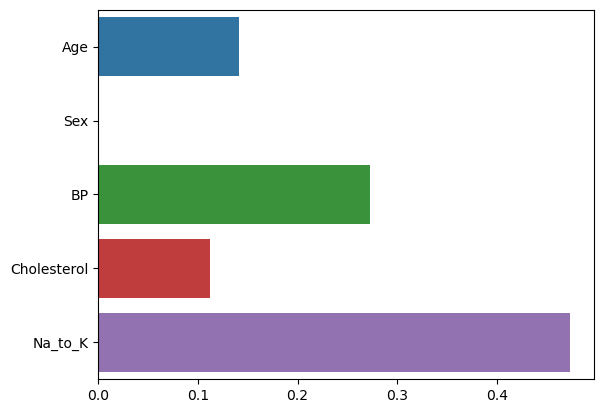

In [35]:
import seaborn as sns

feature_names = drugs_df.columns[:-1]

sns.barplot(x=decision_tree_classifier.feature_importances_, y=feature_names)


### 결정 트리의 과적합
- 위에서 알아낸 것처럼 petal length, petal width, 2개의 feature만으로도 분류가 가능하기 때문에, 2차원 산점도(분포도)를 통해 시각화할 수 있다.
- 마지막까지 노드가 분리되었기 때문에 과적합이 발생했을 가능성이 있고, 이를 하이퍼 파라미터 튜닝을 통해 해결할 수 있다.  
📌하이퍼 파라미터란, 최적의 훈련 모델을 구현하기 위해 알고리즘의 수치를 조정할 수 있는 변수를 의미한다.

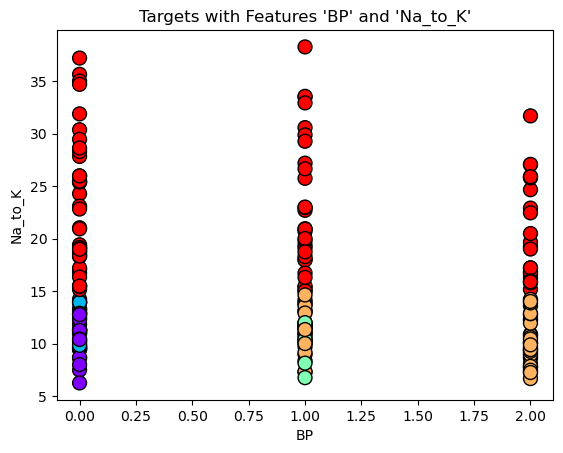

In [48]:
import matplotlib.pyplot as plt

# 'Drug' 컬럼을 제외한 모든 컬럼을 특성으로 사용
features = drugs_df.drop('Drug', axis=1)

targets = drugs_df['Drug']

plt.title("Targets with Features 'BP' and 'Na_to_K'")
plt.scatter(features['BP'], features['Na_to_K'], marker='o', c=targets, s=100, cmap="rainbow", edgecolors='k')
plt.xlabel('BP')
plt.ylabel('Na_to_K')
plt.show()


In [70]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

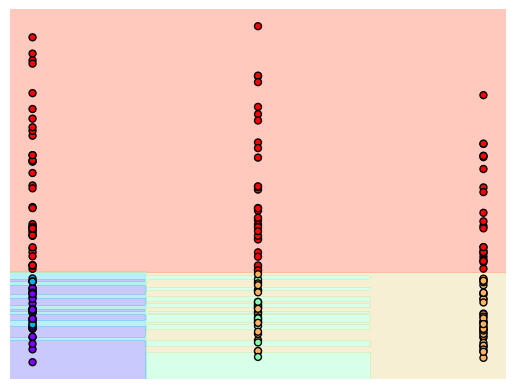

In [75]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt


features = drugs_df[['BP', 'Na_to_K']].values
targets = drugs_df['Drug'].values

decision_tree_classifier = DecisionTreeClassifier(random_state=124).fit(features, targets)

visualize_boundary(decision_tree_classifier, features, targets)

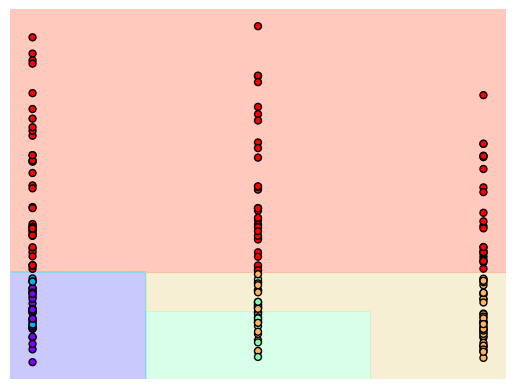

In [79]:
from sklearn.tree import DecisionTreeClassifier

features = drugs_df[['BP', 'Na_to_K']].values
targets = drugs_df['Drug'].values

decision_tree_classifier = DecisionTreeClassifier(random_state=124, min_samples_leaf=15).fit(features, targets)

visualize_boundary(decision_tree_classifier, features, targets)

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier 생성
decision_tree_classifier = DecisionTreeClassifier(random_state=124, min_samples_leaf=15)

# drugs_df에서 특성과 타겟 분리
X = drugs_df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = drugs_df['Drug']

# 데이터를 학습과 테스트 데이터 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# DecisionTreeClassifier 학습
decision_tree_classifier.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=15, random_state=124)